In [39]:
import snscrape
import snscrape.modules.twitter as sn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.linear_model as skl
from matplotlib import ticker

In [40]:
Dati = pd.read_csv('/home/francesco/Codici/Computazionale/Dc1/Punto B2/Totali_Riscaldamento_Globale.csv')

<BarContainer object of 5 artists>

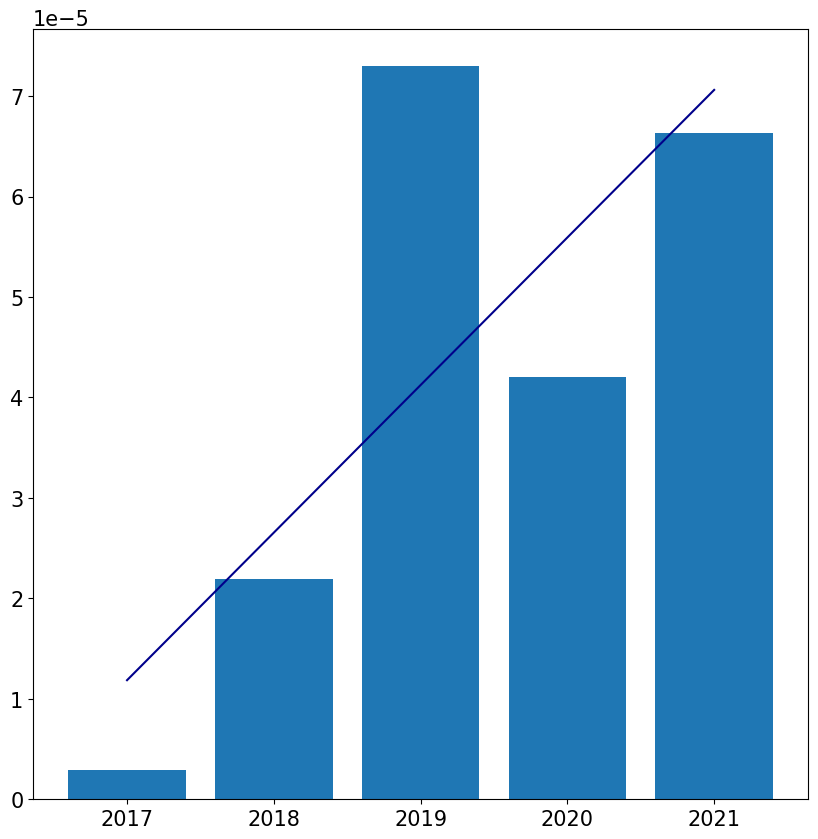

In [41]:
Dati['Data'] = pd.to_datetime(Dati['Data'])
Dati['Anno'] = Dati.Data.dt.year
bar = Dati.groupby(['Anno']).Data.count()
reg = skl.LinearRegression()
utenti_ita = [10.5 , 11.7 , 12.3 , 13.5 , 14.8 , 15] 
dati = bar/utenti_ita/10**6
dati = dati[dati.index < 2022]
dati = dati[dati.index > 2016] 
anni = np.array(dati.index).reshape((-1 , 1))
lin = reg.fit(anni , dati.values)
plt.plot(anni , lin.predict(anni) , color='darkblue')
plt.bar(dati.index , dati.array)

<BarContainer object of 5 artists>

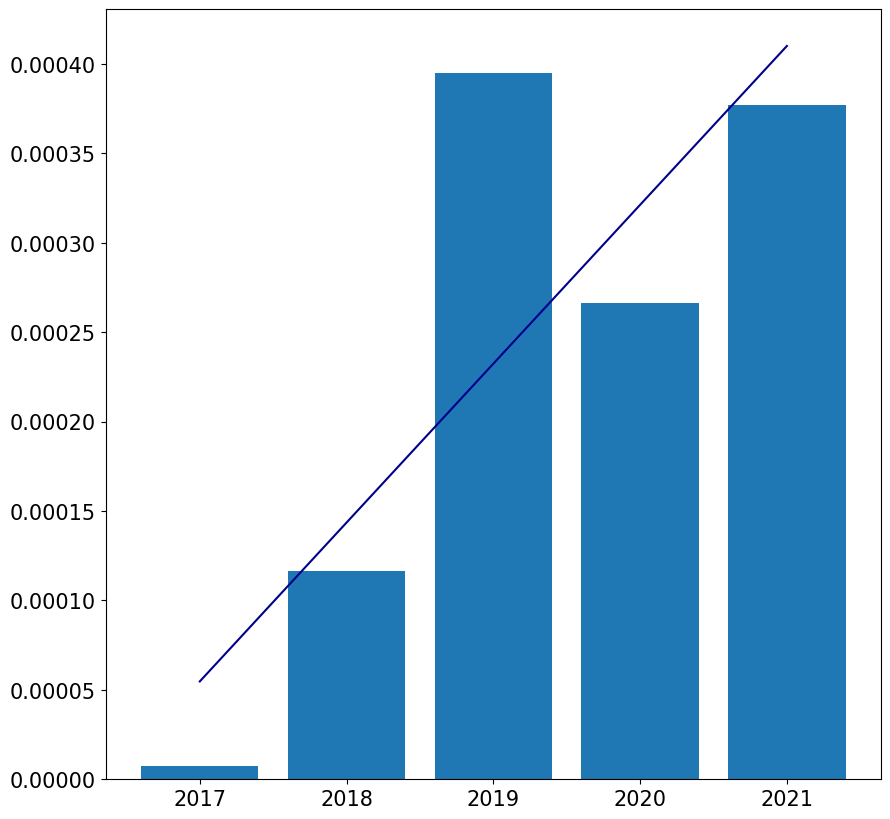

In [42]:
Dati_Crucchi = pd.read_csv('/home/francesco/Codici/Computazionale/Dc1/Punto B2/Totali_Riscaldamento_Globale_Crucco.csv')
reg_ger = skl.LinearRegression()
Dati_Crucchi['Data'] = pd.to_datetime(Dati_Crucchi['Data'])
Dati_Crucchi['Anno'] = Dati_Crucchi.Data.dt.year
bar_crucco = Dati_Crucchi.groupby(['Anno']).Data.count()
utenti_germania = [12.6 , 12.9 , 12.5  , 12.7 ,13.5 ,13.5]
dati_germania = bar_crucco/utenti_germania/10**6
dati_germania = dati_germania[dati_germania.index < 2022]
dati_germania = dati_germania[dati_germania.index > 2016] 
anni = np.array(dati_germania.index).reshape((-1 , 1))
lin_ger = reg_ger.fit(anni , dati_germania.values)
plt.plot(anni , lin_ger.predict(anni) , color='darkblue')
plt.bar(dati_germania.index , dati_germania.array)

<BarContainer object of 5 artists>

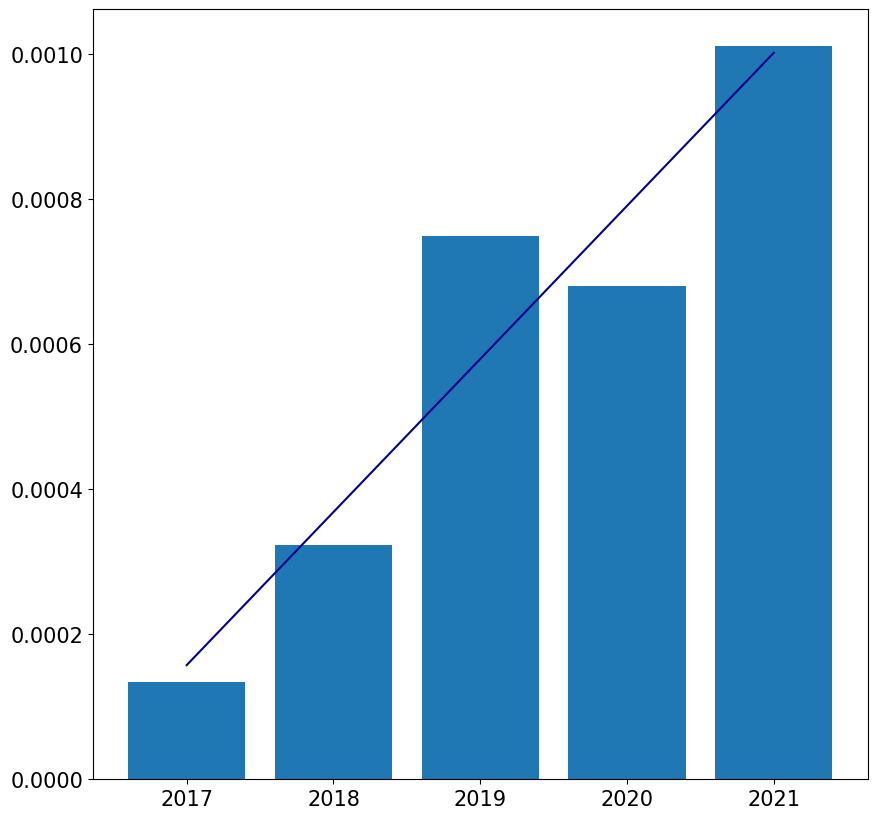

In [43]:
Dati_Fra = pd.read_csv('/home/francesco/Codici/Computazionale/Dc1/Tweet2.0/Totali_Riscaldamento_Globale_Fra.csv')
reg_fra = skl.LinearRegression()
Dati_Fra['Data'] = pd.to_datetime(Dati_Fra['Data'])
Dati_Fra['Anno'] = Dati_Fra.Data.dt.year
bar_Fra = Dati_Fra.groupby(['Anno']).Data.count()

utenti_bar_Fra = [1 , 1 ,  1 , 1 , 9.2 , 10.2  , 11.3 , 11.6 , 11.8 , 13.1] 
dati_fra = bar_Fra/utenti_bar_Fra/10**6
dati_fra = dati_fra[dati_fra.index < 2022]
dati_fra = dati_fra[dati_fra.index > 2016] 
anni = np.array(dati_fra.index).reshape((-1 , 1))
lin_fra = reg_fra.fit(anni , dati_fra.values)
plt.plot(anni , lin_fra.predict(anni) , color='darkblue')
plt.bar(dati_fra.index , dati_fra.array)

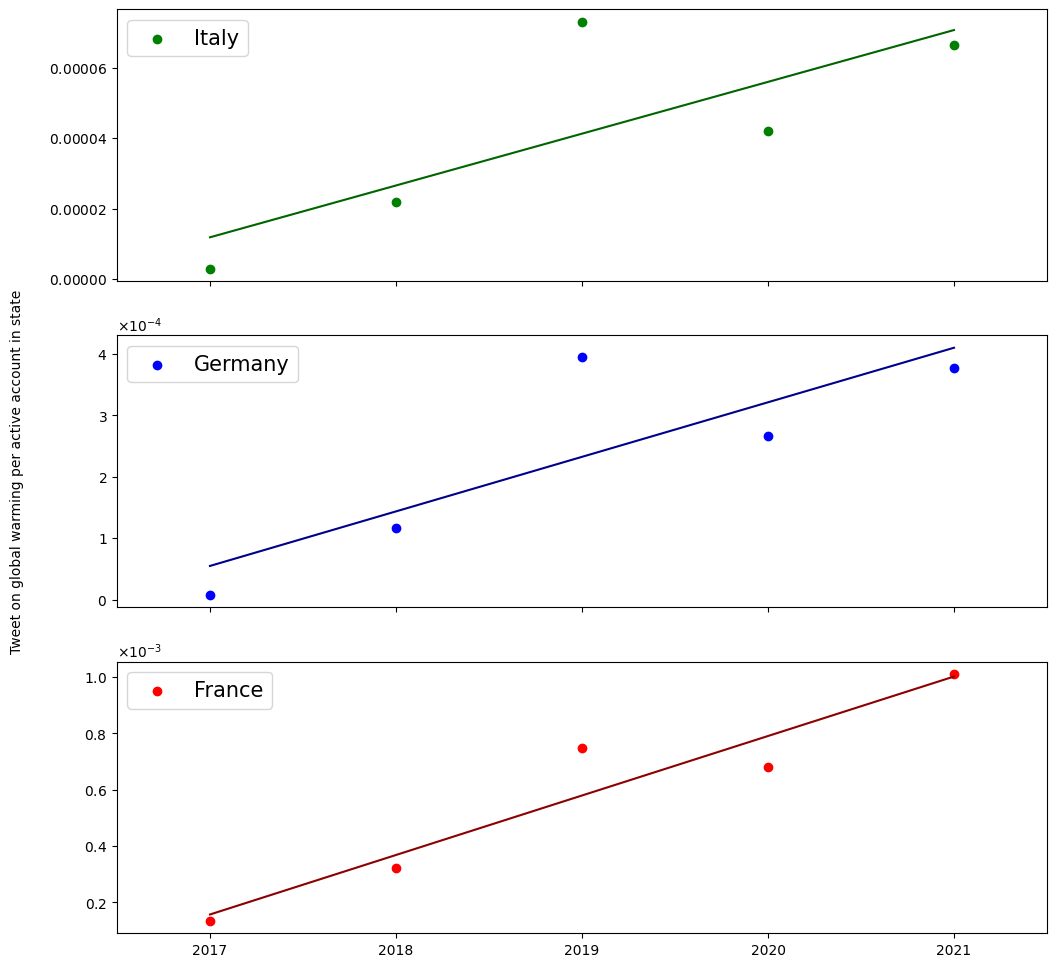

In [54]:
fig , axs = plt.subplots(3  , sharex=True)
plt.rcParams['figure.figsize'] = [10,10]
plt.rc('font', **{'size':'15'})
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
axs[0].scatter(dati.index , dati , label = 'Italy' , color = 'green')
axs[0].plot(anni , lin.predict(anni) , color='darkgreen')
axs[1].scatter(dati_germania.index , dati_germania , label = 'Germany' , color = 'blue')
axs[1].plot(anni , lin_ger.predict(anni) , color='darkblue')
axs[2].scatter(dati_fra.index , dati_fra ,label = 'France' ,  color = 'red')
axs[2].plot(anni, lin_fra.predict(anni), color='darkred')
axs[1].set_ylabel('Tweet on global warming per active account in state' )
axs[1].yaxis.set_label_coords( x = -0.1 , y = 0.5)
for i in axs : 
    i.legend(loc = 'upper left')
    i.set_xlim(2016.5 , 2021.5)
    i.yaxis.set_major_formatter(formatter)


In [45]:
def somma(a , b) : 
    c = []
    for i in range(len(a)) : 
        c.append(a[i] + b[i])

    c[0] = c[2]/c[1]
    return c

In [46]:
Germania = pd.read_csv('/home/francesco/Codici/Computazionale/Dc1/Tweet2.0/Germania.csv' , dtype={'Tweet_p' : float})
Italia = pd.read_csv('/home/francesco/Codici/Computazionale/Dc1/Tweet2.0/Italia.csv' , dtype={'Tweet_p' : float})
Francia = pd.read_csv('/home/francesco/Codici/Computazionale/Dc1/Tweet2.0/Francia.csv' , dtype={'Tweet_p' : float})


In [47]:
Italia22 = Italia.loc[Italia.Year == 2022]
Italia18 = Italia.loc[Italia.Year == 2018]
Italia18.reset_index(inplace=True)

Germania21 = Germania.loc[Germania.Year == 2021]
Germania17 = Germania.loc[Germania.Year == 2017]
Germania17.reset_index(inplace=True)

Francia22 = Francia.loc[Francia.Year == 2022]
Francia17 = Francia.loc[Francia.Year == 2017]
Francia17.reset_index(inplace=True)
Italia22
print(type(Francia17.Tweet_p[0]))

<class 'numpy.float64'>


In [48]:
def format(Dati) : 
    for i in range(len(Dati.Tweet)) :
        Dati.Tweet_p[i] = '{:1.3f}'.format(Dati.Tweet_p[i])
    

In [49]:
#format(Italia18)
#format(Italia22)
#format(Germania17)
#format(Germania21)
#format(Francia17)
#format(Francia22)
#for i in Italia22.Tweet_p  :
#    print(i)

In [50]:
def bar_plot(Dati , dove , titolo , colore) : 
    Disegno = Dati[Dati.Risultati > 5]
    ax = Disegno.plot.bar( x = 'Partiti' , y = ['Tweet_p'] ,  color= colore , legend = False ,
        ylabel = 'Tweet on global warming (%)' , ax = dove ,  title = titolo , xlabel = '')
    #dove.set_ylim(0,35)
    #counter = 0
    #for patch in ax.patches :
    #    bl = patch.get_xy()
    #    x = 0.5 * patch.get_width() + bl[0] 
    #    y = patch.get_height() + bl[1] + 0.2
    #    ax.text(x,y,((Dati.Partiti[counter])), ha = 'center', rotation = 'horizontal')
    #    counter = counter +1

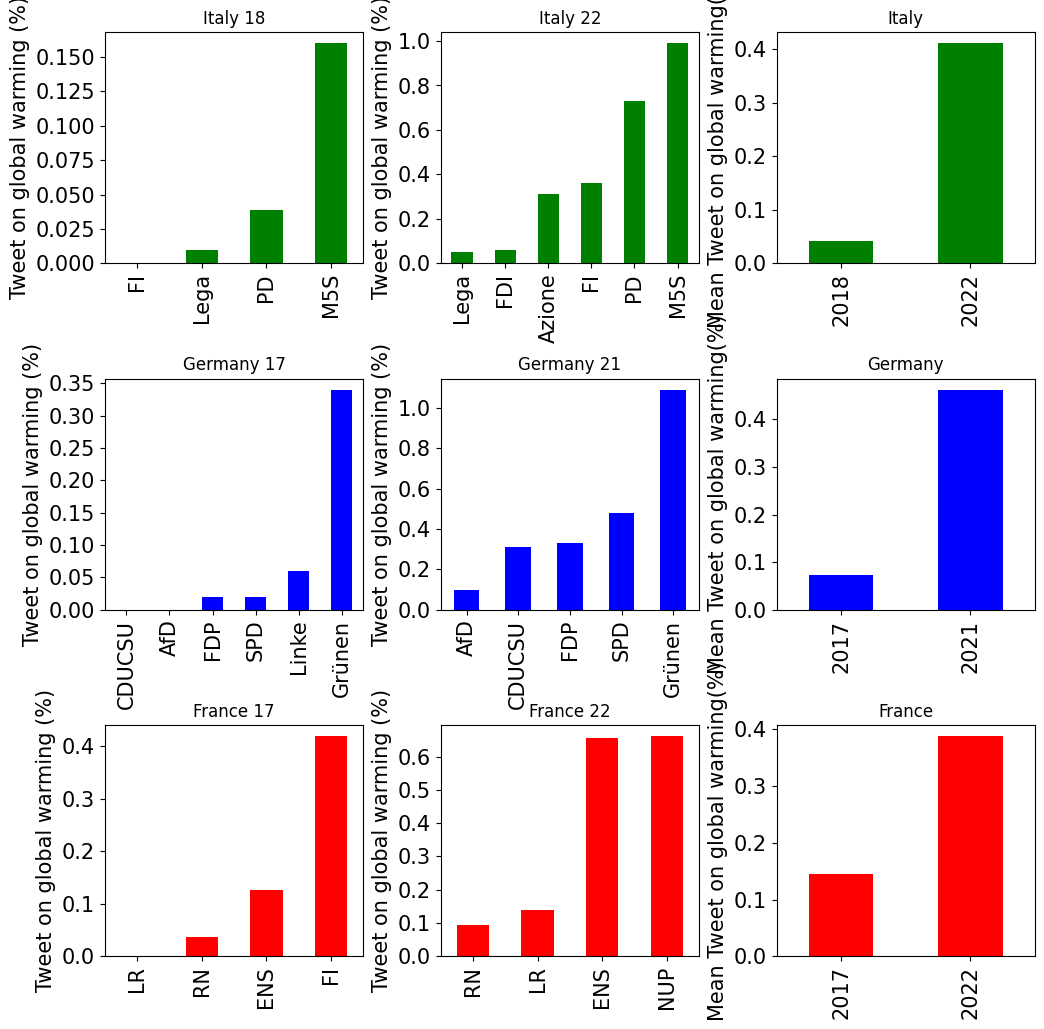

In [51]:
#Grafico
plt.rcParams['figure.figsize'] = [12, 12]
fig , axs = plt.subplots(3 , 3)
plt.rc('font', **{'size':'10'})

#Italia
bar_plot(Italia22 , axs[0,1] , 'Italy 22' , 'green')
bar_plot(Italia18 , axs[0,0] , 'Italy 18' , 'green')
Italia.groupby('Year').Tweet_p.mean().plot.bar(ax = axs[0,2] ,xlabel = '', title = 'Italy' ,  color= 'green')
axs[0,2].set_ylabel('Mean Tweet on global warming(%)')

#Germania
bar_plot(Germania21 , axs[1,1] , 'Germany 21' , 'blue')
bar_plot(Germania17 , axs[1,0] , 'Germany 17' , 'blue')
Germania.groupby('Year').Tweet_p.mean().plot.bar(ax = axs[1,2] , xlabel = '' , color = 'blue' , title = 'Germany')
axs[1,2].set_ylabel('Mean Tweet on global warming(%)')

#Francia
bar_plot(Francia22 , axs[2,1] , 'France 22' , 'red')
bar_plot(Francia17 , axs[2,0] , 'France 17' , 'red')
Francia.groupby('Year').Tweet_p.mean().plot.bar(ax = axs[2,2] , xlabel = '', title = 'France' ,  color = 'red')
axs[2,2].set_ylabel('Mean Tweet on global warming(%)')

fig.subplots_adjust(hspace=0.5 , wspace=0.3)

In [52]:
def scatter(Dati , dove , titolo , colori) : 
    Disegno = Dati[Dati.Risultati > 5]
    dove.set_xscale('linear')
    dove.scatter(x = Disegno['Tweet_p'] ,label = 'total' ,  y = Disegno['Risultati']  , color = colori[0])
    dove.scatter(x = Disegno['Tweet_p'] ,label = 'Under 35' , y = Disegno['Risultati_U35']  ,  color = colori[1])
    dove.set_ylabel('Votes (%)')
    dove.set_ylim(0 , 37)
    dove.set_title (titolo)

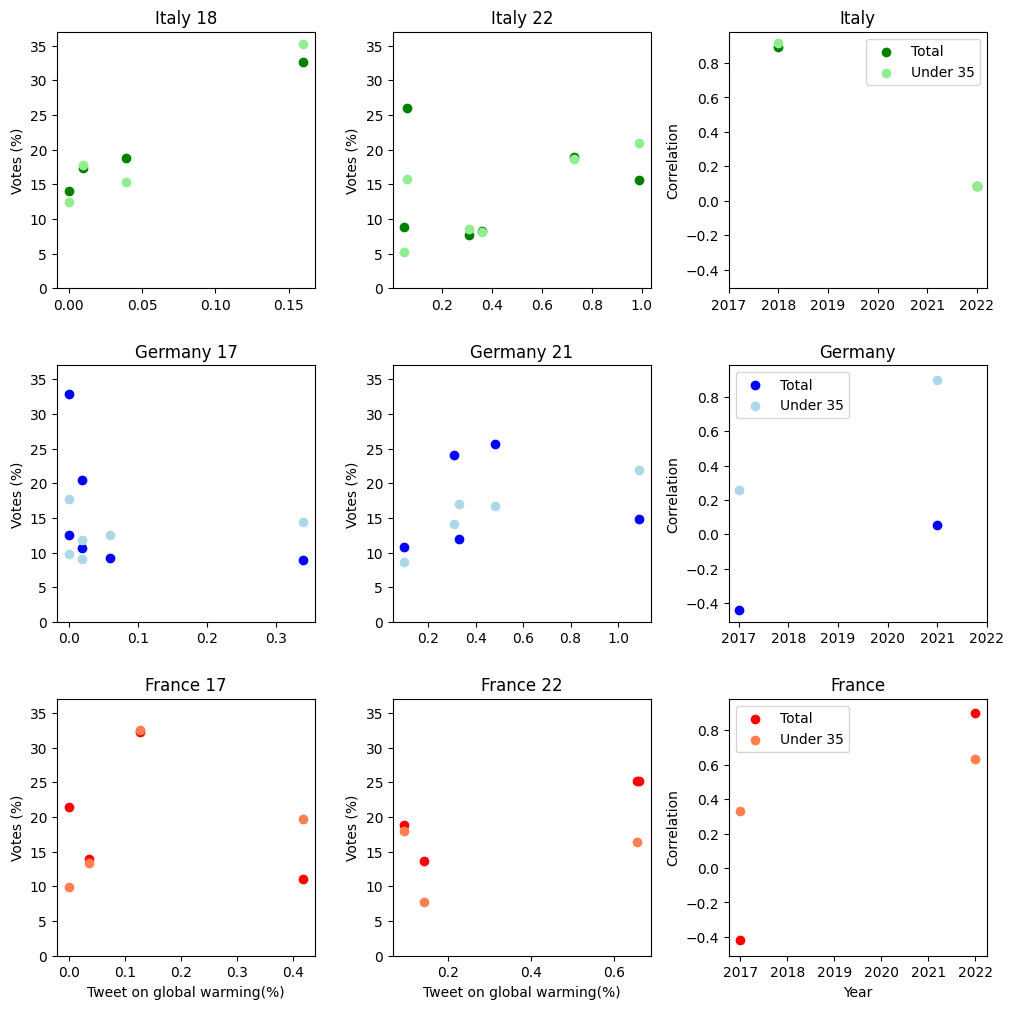

In [53]:
plt.rcParams['figure.figsize'] = [12, 12]
fig , axs = plt.subplots(3 , 3 , sharey='col')
plt.rc('font', **{'size':'10'})

#Italia
scatter(Italia22 , axs[0,1] , 'Italy 22' , ['green' , 'lightgreen'])
scatter(Italia18 , axs[0,0] , 'Italy 18' , ['green' , 'lightgreen'])
axs[0,2].scatter([2018 , 2022] , [ Italia18.Tweet_p.corr(Italia18['Risultati']), Italia22.Tweet_p.corr(Italia22['Risultati'])] , label = 'Total' , color = 'green')
axs[0,2].scatter([2018 , 2022] , [ Italia18.Tweet_p.corr(Italia18['Risultati_U35']), Italia22.Tweet_p.corr(Italia22['Risultati'])] , label = 'Under 35' , color = 'lightgreen')
axs[0,2].legend()
axs[0,2].set_ylabel('Correlation')
axs[0,2].set_title('Italy')
axs[0,2].set_xticks([2017, 2018 , 2019 , 2020 , 2021 , 2022])

#Germania
scatter(Germania21 , axs[1,1] , 'Germany 21' , ['blue' , 'lightblue'])
scatter(Germania17 , axs[1,0] , 'Germany 17' , ['blue' , 'lightblue'])
axs[1,2].scatter([2017 , 2021] , [Germania17.Tweet_p.corr(Germania17['Risultati']) , Germania21.Tweet_p.corr(Germania21['Risultati'])]  
                ,color = 'blue' , label = 'Total')
axs[1,2].scatter([2017 , 2021] , [Germania17.Tweet_p.corr(Germania17['Risultati_U35']) , Germania21.Tweet_p.corr(Germania21['Risultati_U35'])] 
                ,color = 'lightblue' , label = 'Under 35')
axs[1,2].legend()
axs[1,2].set_ylabel('Correlation')
axs[1,2].set_title('Germany')
axs[1,2].set_xticks([2017, 2018 , 2019 , 2020 , 2021 , 2022])


#Francia
scatter(Francia22 , axs[2,1] , 'France 22' , ['red' , 'coral'])
scatter(Francia17 , axs[2,0] , 'France 17' , ['red' , 'coral'])
axs[2,2].scatter([2017 , 2022] , 
[Francia17.Tweet_p.corr(Francia17['Risultati']) , Francia22.Tweet_p.corr(Francia22['Risultati'])] , color = 'red' , label = 'Total')
axs[2,2].scatter([2017 , 2022] , 
[Francia17.Tweet_p.corr(Francia17['Risultati_U35']) , Francia22.Tweet_p.corr(Francia22['Risultati_U35'])] , color = 'coral' , label = 'Under 35')
axs[2,2].legend()
axs[2,2].set_ylabel('Correlation')
axs[2,2].set_title('France')

axs[2,2].set_xlabel('Year')
axs[2,0].set_xlabel('Tweet on global warming(%)')
axs[2,1].set_xlabel('Tweet on global warming(%)')
axs[2,2].set_xticks([2017, 2018 , 2019 , 2020 , 2021 , 2022])
fig.subplots_adjust(hspace=0.3 , wspace=0.3)